## 데이터 준비

In [8]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline


In [9]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
elif platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print("Error...")

# 영화 분석 모델

In [10]:
origin = pd.read_excel('data/영화정보 삭제1.xlsx')

In [11]:
movie = pd.read_csv('data/movie2.csv', encoding='CP949')

In [12]:
origin

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,136000000000,17613682,한국,씨제이이앤엠(주),한국,김한민,사극,액션,NaN,NaN,NaN,NaN,NaN
1,베테랑,105000000000,13414009,한국,씨제이이앤엠(주),한국,류승완,액션,드라마,NaN,NaN,NaN,NaN,NaN
2,도둑들,93664808500,12983178,한국,(주)쇼박스,"한국,홍콩",최동훈,액션,범죄,NaN,NaN,NaN,NaN,NaN
3,7번방의 선물,91431914670,12811206,한국,(주)넥스트엔터테인먼트월드(NEW),한국,이환경,코미디,드라마,NaN,NaN,NaN,NaN,NaN
4,암살,98463132781,12705700,한국,(주)쇼박스,한국,최동훈,액션,드라마,NaN,NaN,NaN,NaN,NaN
5,"광해, 왕이 된 남자",88899448769,12319390,한국,씨제이이앤엠(주),한국,추창민,사극,드라마,NaN,NaN,NaN,NaN,NaN
6,신과함께-인과 연,103000000000,12274163,한국,롯데컬처웍스(주)롯데엔터테인먼트,한국,김용화,판타지,드라마,NaN,NaN,NaN,NaN,NaN
7,택시운전사,95853645649,12186327,한국,(주)쇼박스,한국,장훈,드라마,NaN,NaN,NaN,NaN,NaN,NaN
8,부산행,93178283048,11565479,한국,(주)넥스트엔터테인먼트월드(NEW),한국,연상호,액션,스릴러,NaN,NaN,NaN,NaN,NaN
9,해운대,81025004000,11324433,한국,씨제이엔터테인먼트,한국,윤제균,액션,드라마,어드벤처,NaN,NaN,NaN,NaN


In [13]:
movie

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,NaN,NaN,NaN,NaN,NaN
1,베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,NaN,NaN,NaN,NaN,NaN
2,도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,NaN,NaN,NaN,NaN,NaN
3,7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,NaN,NaN,NaN,NaN,NaN
4,암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,NaN,NaN,NaN,NaN,NaN
5,"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,NaN,NaN,NaN,NaN,NaN
6,신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,NaN,NaN,NaN,NaN,NaN
7,택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,NaN,NaN,NaN,NaN,NaN,NaN
8,부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,NaN,NaN,NaN,NaN,NaN
9,해운대,8.102500e+10,11324433.0,3,2.6,한국,2.2,액션,드라마,어드벤처,NaN,NaN,NaN,NaN


In [14]:
movie = movie.fillna(0)

# 대표국적 
## 한국 = 3 미국 -=2 일본 1 그외 0 으로 점수화

# 배급사 -
## 가장 높은 순위의 영화 보유가 많은 순 (전체 배급한 영화 중 잘 나간 영화가 많은 배급사에 고급 부여)

# 감독 - 감독의 모든 영화의 관객수의 합을 기준으로 3~0 사이의 값을 부여.
## 30등 이하로는 미세한 차이이므로 0 부여.

In [15]:
movie

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,0,0,0,0,0
1,베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,0,0,0,0,0
2,도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,0,0,0,0,0
3,7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,0,0,0,0,0
4,암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,0,0,0,0,0
5,"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,0,0,0,0,0
6,신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,0,0,0,0,0
7,택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,0,0,0,0,0,0
8,부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,0,0,0,0,0
9,해운대,8.102500e+10,11324433.0,3,2.6,한국,2.2,액션,드라마,어드벤처,0,0,0,0


제작국가, 장르 1 빼고 다 날리자

In [16]:
movie = movie.set_index('영화명')
movie


,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
영화명,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,3,한국,2.4,사극,액션,0,0,0,0,0
베테랑,1.050000e+11,13414009.0,3,3,한국,2.8,액션,드라마,0,0,0,0,0
도둑들,9.366481e+10,12983178.0,3,2.9,"한국,홍콩",3,액션,범죄,0,0,0,0,0
7번방의 선물,9.143191e+10,12811206.0,3,2.8,한국,0.8,코미디,드라마,0,0,0,0,0
암살,9.846313e+10,12705700.0,3,2.9,한국,3,액션,드라마,0,0,0,0,0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,한국,1.3,사극,드라마,0,0,0,0,0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,한국,2.7,판타지,드라마,0,0,0,0,0
택시운전사,9.585365e+10,12186327.0,3,2.9,한국,2.1,드라마,0,0,0,0,0,0
부산행,9.317828e+10,11565479.0,3,2.8,한국,0.4,액션,스릴러,0,0,0,0,0


In [17]:
movie.columns

Index(['매출액', '관객수', '대표국적', '배급사', '제작국가', '감독', '장르1', '장르2', '장르3', '장르4',
       '장르5', '장르6', '장르7'],
      dtype='object')

In [18]:
list=['매출액', '관객수', '대표국적','배급사','감독', '장르1']

In [19]:
movie2 =movie[list]

In [20]:
movie2 

,매출액,관객수,대표국적,배급사,감독,장르1
영화명,,,,,,
명량,1.360000e+11,17613682.0,3,3,2.4,사극
베테랑,1.050000e+11,13414009.0,3,3,2.8,액션
도둑들,9.366481e+10,12983178.0,3,2.9,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,2.8,0.8,코미디
암살,9.846313e+10,12705700.0,3,2.9,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,3,1.3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,판타지
택시운전사,9.585365e+10,12186327.0,3,2.9,2.1,드라마
부산행,9.317828e+10,11565479.0,3,2.8,0.4,액션


In [21]:
movie2['감독']

영화명
명량                          2.4
베테랑                         2.8
도둑들                           3
7번방의 선물                     0.8
암살                            3
광해, 왕이 된 남자                 1.3
신과함께-인과 연                   2.7
택시운전사                       2.1
부산행                         0.4
해운대                         2.2
어벤져스: 인피니티 워                1.8
괴물                          2.3
어벤져스: 에이지 오브 울트론            1.2
겨울왕국                크리스 벅,제니퍼 리
인터스텔라                       2.6
왕의 남자                       2.5
검사외전                        이일형
설국열차                        2.3
관상                          한재림
아이언맨 3                    쉐인 블랙
국제시장                        2.2
캡틴 아메리카: 시빌 워               1.8
해적: 바다로 간 산적                1.7
수상한 그녀                      1.4
신과함께-죄와 벌                   2.7
아바타                     제임스 카메론
국가대표                        2.7
디워                          심형래
공조                          1.9
트랜스포머 3                     2.9
                       ...     
50가지

In [22]:
d=[]
for dic in movie2["감독"]:
    try:
        a= float(dic)
    except ValueError:
        dic=0.1
        a =float(dic)
    d.append(a)   

In [23]:
d

[2.4,
 2.8,
 3.0,
 0.8,
 3.0,
 1.3,
 2.7,
 2.1,
 0.4,
 2.2,
 1.8,
 2.3,
 1.2,
 0.1,
 2.6,
 2.5,
 0.1,
 2.3,
 0.1,
 0.1,
 2.2,
 1.8,
 1.7,
 1.4,
 2.7,
 0.1,
 2.7,
 0.1,
 1.9,
 2.9,
 0.1,
 2.4,
 2.9,
 2.9,
 1.1,
 0.1,
 2.8,
 1.9,
 1.2,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.5,
 0.1,
 0.0,
 0.1,
 0.1,
 2.8,
 0.6,
 0.1,
 2.6,
 2.5,
 0.1,
 0.7,
 0.6,
 0.1,
 0.0,
 2.6,
 0.1,
 0.0,
 3.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.1,
 2.9,
 0.1,
 0.0,
 0.1,
 0.0,
 1.7,
 0.1,
 0.1,
 0.1,
 0.1,
 0.5,
 0.1,
 0.9,
 0.1,
 0.7,
 0.1,
 0.1,
 0.3,
 0.1,
 0.1,
 0.1,
 0.9,
 0.9,
 0.1,
 0.1,
 0.1,
 1.4,
 2.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.0,
 1.1,
 1.0,
 0.1,
 1.6,
 0.1,
 0.1,
 0.1,
 0.1,
 0.2,
 0.1,
 0.1,
 2.6,
 1.7,
 0.1,
 0.1,
 0.1,
 1.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 1.4,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 2.0,
 0.1,
 1.0,
 0.1,
 0.1,
 3.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 1.9

In [24]:
df = pd.DataFrame(d)

df=df.rename(columns = {0:'감독'})


In [25]:
d1=[]
for dic in movie2["배급사"]:
    print(dic)
    try:
        a= float(dic)
    except ValueError:
        dic=0.1
        a =float(dic)
    d1.append(a)   

3
3
2.9
2.8
2.9
3
2.7
2.9
2.8
2.6
2.5
2.9
2.5
2.3
2.2
2.1
2.9
3
2.9
2.3
3
2.5
2
3
2
0.4
2.9
2.9
3
3
2.2
2
2.6
2.6
3
1.8
3
2.9
1.7
2.9
3
2.9
0
2.9
1.6
1.5
0
2.6
3
3
2.7
2.9
2.2
2.9
2.6
1.6
2
2.8
0
2.2
2.8
0
2.6
1.4
2
2.8
0
2
2
1.4
2.8
2.5
2.5
3
2.8
2.9
2.5
0
2.8
0
3
3
2
0
2.5
0
3
1
2.6
2.8
3
2.9
3
3
2.5
1.6
3
2.8
1.6
2.5
1.7
2.9
2.9
2.9
2.5
2.2
2.8
3
2.2
2.6
2.7
2.8
1.7
1.4
2.9
3
2
2.6
2.2
2
1.6
2.8
2.6,2.1
2.6
3
2.9
2.3
2.6
2
1.4
주식회사 해리슨앤컴퍼니,2.2
3
2
(주)싸이더스
2.9
2,(주)싸이더스
2.8
1.6
3
2.3
브에나비스타인터내셔널코리아
2.9
1.8
2.9
0
2
3
CGV아트하우스,(주)대명문화공장
2.2
2.9
1.6
2.6
2.2
1.4
1.6
1.4
1.1
2.6
2.2
(주)와우픽쳐스
0
0
1.7
2.9
2.5
2.8
2.9
3
0
판씨네마(주)
3
1.7
2.6
2.6
2
1.4
1.6
2.2
2.9
2,(주)리틀빅픽쳐스
1.4
2
2.9
2.2
1.4
주식회사 해리슨앤컴퍼니,2.2
2.2
0
1.3
3
3
2.1
1.7
3
2.6
아이러브시네마
2
2.5
2.8
2.3
2.6
2.5
2.9
소니픽쳐스릴리징코리아
2.6
2
3
2.6
3
2.6
2.6
2
2.6
1.3
2.2
1.8
2.9
(주)인벤트스톤,영화사청어람(주)
1.6
㈜인디스토리
2.9
1.7
2.9
1.4
0
1.4
3
2.5
2.6
1.1
1.6
2.5
2.5
2.2
3
1.6
1.6
2.5
2.9
2.6
1.7
2
1.6
2
0
2.6
2.9
2
2.9
2.6
2.9
2.8
1
2.2
2.6
2
0
3
1.4
2
1.4
2

2.2
1.6
1.4
2.2
스폰지
1.6
2.2
(주)시너지하우스 (시너지)
0
1.1
3
(주)이수C&E
2.6
(주)이수C&E
㈜메가박스
0
팝엔터테인먼트,1.7
1.4
(주)인벤트스톤
2.1
(재)CBS
씨너스엔터테인먼트(주)
(주)프라임엔터테인먼트
1.6
(주)나이너스엔터테인먼트
1.3
0
2.6
CGV아트하우스
(주)이수C&E
0
1
1.4
0
2.6
0
CGV아트하우스
0
(주)나이너스엔터테인먼트
(주)싸이더스
판씨네마(주)
2.6
0
오퍼스픽쳐스
스튜디오플러스(주)
(주)팝엔터테인먼트
2
3
1.4
(주)디스테이션
2.2
2.6
2
0
2
(주)팝파트너스
0
2.9
1.4
(주)프라임엔터테인먼트,(주)유레카픽쳐스
2.8
1.3
0
1.1,(주)레드로버
(재)CBS
에스케이텔레콤(주)
(주)영화사 빅
1.6
2.2
2.6
투니버스(주)온미디어
1.6
1.4
(주)대명문화공장,(주)리틀빅픽쳐스
(주)티캐스트
1.4
2.2
(주)인벤트스톤
2.9
(주)이수C&E
2
0
2.8
(주)싸이더스
0
0
2
0
2.6
2
(주)디스테이션,(주)엔케이컨텐츠,2
2
에스케이텔레콤(주)
0
(주)시너지하우스 (시너지)
0
(주)미로비젼
1.4
1.3
(주)화천공사
1.6
영화사청어람(주)
(주)스폰지이엔티
0
0
3
씨네그루(주)다우기술
(주)이수C&E
(주)프라임엔터테인먼트
(주)케이알씨지,(주)시너지하우스 (시너지)
2.8
0
2.1
2.9
0
(주)화앤담이엔티
1.6
0
(주)미로비젼
1.4
(주)싸이더스
소니픽쳐스릴리징코리아
(주)튜브엔터테인먼트
(주)마인스 엔터테인먼트
3
필라멘트픽쳐스
2.2
2.2
1.6
(주)누리픽쳐스
씨네그루(주)키다리이엔티
에이원엔터테인먼트
영화사청어람(주)
(주)스폰지이엔티
1.7
2.2
2.2
1.4
2
2.8
2.9
1.3
2.1
(주)영화사 진진
2
1.6
2
(주)성원아이컴
0
쇼이스트(주)
(주)이수C&E
2
(주)이수C&E,(주)스톰픽쳐스코리아
1.1
(주)박수엔터테인먼트,㈜코리아스크린
(주)시너지하우스 (시너지)
㈜

필름메신저
0
(주)팝엔터테인먼트
(주)영화사오원
(주)나이너스엔터테인먼트
제인앤유
찬란
(주)엣나인필름
씨네그루(주)다우기술
(주)티캐스트콘텐츠허브
(주)팝엔터테인먼트
(주)팝엔터테인먼트
예지림엔터테인먼트
(주)모멘텀엔터테인먼트
판씨네마(주)
소나무미디어
메가박스중앙(주)
예지림엔터테인먼트
(주)엣나인필름
(주)콘텐츠판다,(주)영화제작전원사 ,무브먼트
KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)
1.3
(주)팝엔터테인먼트
㈜세종커뮤니케이션스
(주)영화사 진진
1.4
(주)디스테이션
2.6
실버스푼
오드
소니픽쳐스릴리징코리아
(주)스크린와이즈
프리비젼엔터테인먼트
0
그린나래미디어(주)
주식회사 씨네룩스
(주)영화사 진진
와이드 릴리즈(주)
쿠즈엔터테인먼트,야바다바두
(주)영화사 진진
찬란
(주)영화사 진진
(주)수키픽쳐스
노바엔터테인먼트
(주)유레카픽쳐스
(주)엣나인필름
(주)드림웨스트픽쳐스
(주)인디플러그
㈜케이디미디어
0
(주)팝엔터테인먼트
(주)라이크 콘텐츠
주식회사 마운틴픽쳐스
스폰지
그린나래미디어(주)
(주)인디플러그
(주)영화사 조제
(주)대명문화공장,KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)
(주)인벤트스톤
(주)에스와이코마드,글뫼 주식회사
(주)스폰지이엔티,스폰지
(주)영화사 진진
0
0
(주)영화사구안
0
(주)팝엔터테인먼트
0
필라멘트픽쳐스
(주)박수엔터테인먼트
프리비젼엔터테인먼트
(주)영화사 빅
(주)미루픽처스
(주)리틀빅픽쳐스
2.6
(주)나이너스엔터테인먼트
주식회사 마운틴픽쳐스
2.6
(주)영화사 빅
(주)나이너스엔터테인먼트
(주)더블앤조이픽쳐스,주식회사 쇼미미디어앤트레이딩
0
(주)판다미디어
2.9
(주)프레인글로벌
와이드 릴리즈(주)
0
(주)에이원엔터테인먼트
판씨네마(주)
스폰지
(주)스톰픽쳐스코리아
(주)드림컴스
(주)판다미디어
(주)영화사 진진
0
(주)시네마달
케이비에스미디어(주),주식회사 마운틴픽쳐스
(주)팝파트너스
시네마달
0
0
(주)팝엔터테인먼트
㈜씨에이엔
와이드 릴리즈(주)
에이원엔터테인먼트
(주)스폰지이엔티

0
0
0
0
0
(주)제이앤씨미디어그룹
파인스토리
㈜인디스토리
0
0
스크린조이
(주)소나무픽쳐스
(주)소나무픽쳐스
예지림엔터테인먼트
0
0
0
에스디시코리아 주식회사
주식회사 디에스이이디
0
스크린조이
와이드 릴리즈(주)
에이원엔터테인먼트
위드시네마
0
(주)키노아이디엠씨
서울독립영화제
0
0
예지림엔터테인먼트
0
주식회사 쇼미미디어앤트레이딩
(주)소나무픽쳐스
0
(주)액티버스엔터테인먼트
0
(주)미디어데이
0
㈜인디스토리
와이드 릴리즈(주)
(주)월드시네마
0
(주)액티버스엔터테인먼트
에이원엔터테인먼트
스폰지
CGV아트하우스
(주)머스트씨무비릴리징컴퍼니
0
와이드 릴리즈(주)
㈜인디스토리
㈜코리아스크린,와이드 릴리즈(주)
0
찬란
0
0
0
0
0
0
주식회사 마운틴픽쳐스
0
프리비젼엔터테인먼트
어뮤즈
와이드 릴리즈(주)
(주)드림팩트엔터테인먼트
(주)맑은시네마
(주)지어소프트
(주)디스테이션
이언픽쳐스
(주)스폰지이엔티
0
(주)소나무픽쳐스
(주)박수엔터테인먼트
(주)영화사오원
㈜인디스토리
0
메가박스중앙(주)
0
주식회사 마운틴픽쳐스
(주)소나무픽쳐스
0
(주)인디플러그
0
0
찬란
0
스크린조이
0
(주)영화사 진진
㈜인디스토리
0
(주)영화사 조제
0
(주)스폰지이엔티
㈜인디스토리
(주)스폰지이엔티,스폰지
(주)디앤아이컴퍼니
(주)케이알씨지
0
0
0
골든타이드픽처스(주)
주식회사 마운틴픽쳐스
0
0
(주)케이알씨지
스폰지
0
㈜세종커뮤니케이션스
(주)에이원엔터테인먼트
(주)영화사 조제
주식회사 마운틴픽쳐스
문화선교연구원
(주)액티버스엔터테인먼트
(주)영화사선
(주)영화사오원
(주)소나무픽쳐스
(주)이모션픽처스
예지림엔터테인먼트
(주)성원아이컴
(주)키노아이디엠씨
(주)소나무픽쳐스
영희야 놀자
(주)스넵쏘울
0
(주)드림팩트엔터테인먼트
(주)스폰지이엔티
(주)박수엔터테인먼트
(주)소나무픽쳐스
스크린조이
제인앤유
0
(주)소나무픽쳐스
0
0
0
(주)소나무픽쳐스
오드
(주)에스비에스콘텐츠허브
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
0


0
0
0
길스토리
(주)엣나인필름
0
(유)영화사 화수분
(주)미로스페이스
주식회사 풍경소리
0
주식회사 풍경소리
(주)화인웍스
(유)마스엔터테인먼트코리아
팝엔터테인먼트
골든타이드픽처스(주)
0
(주)소나무픽쳐스
0
0
㈜스튜디오이쩜영
0
0
0
(주)영화사 조제
C 무비
주식회사 씨엠닉스
(주)소나무픽쳐스
0
0
0
0
주식회사 마운틴픽쳐스
0
0
0
0
0
0
(주)투한미디어
씨네굿
0
0
0
(주)영화사 조제
0
1.7
0
(주)유로커뮤니케이션
0
0
0
미디어소프트
0
(주)영화사 조제
주식회사 마운틴픽쳐스
0
(주)소나무픽쳐스
0
(주)키노아이디엠씨
하준사
(주)스마일이엔티
0
0
0
0
㈜인디스토리
0
0
주식회사 풍경소리
주식회사 풍경소리
더그레이트 컴퍼니
0
0
(주)소나무픽쳐스
0
(주)미로비젼
골든타이드픽처스(주)
0
0
(주)더블앤조이픽쳐스
0
0
0
0
0
0
0
(주)영화사 안다미로
(주)레인보우팩토리
0
0
0
(주)시네마달
0
주식회사 마운틴픽쳐스
0
0
쟈비스미디어
0
0
0
㈜인디스토리
(주)더블앤조이픽쳐스
0
0
0
성길시네마,아이제이미디어(주)
(주)더블앤조이픽쳐스
(주)쇼타임
0
0
그린나래미디어(주)
0
0
0
0
0
M&M 인터내셔널
0
에스디시코리아 주식회사
시네마달,(사)한국독립영화협회
(주)쓰리캣프로덕션
0
0
(주)영화사 진진
주식회사 마운틴픽쳐스
0
0
영화사 보라
0
0
(주)시네마달
0
(주)유레카픽쳐스
2.6
0
씨제이 씨지브이(CJ CGV)(주)
0
0
주식회사 마운틴픽쳐스
0
(주)케빈앤컴퍼니
0
주식회사 풍경소리
0
0
주식회사 풍경소리
0
0
(주)더블앤조이픽쳐스
(주)케빈앤컴퍼니
(주)소나무픽쳐스
0
(주)스마일이엔티
0
어뮤즈
0
예지림엔터테인먼트
(주)소나무픽쳐스
0
0
(주)인스터피씨엠
0
0
0
(주)씨에이씨엔터테인먼트
0
0
(주)인스터피씨엠
0
0
(주)제이에이와이이엔터테인먼트
0
0
0
0
0
(주)팝엔터테인먼트
0
0
0
0
0
0
스크린조이
서울독립영화제
0
글뫼 주식회사,(주)퍼

0
0
0
0
0
(주)케이피에이기획
스마일컨텐츠
0
0
0
스마일컨텐츠
0
0
0
0
0
0
0
0
0
0
0
0
0
0
스크린조이
0
0
0
0
0
조이앤키노
0
(주)케이알씨지
0
0
0
0
0
0
0
0
0
0
0
스마일컨텐츠
0
0
스마일컨텐츠
0
(주)영화사 사계절
0
(주)케이피에이기획
주식회사 레드아이스
(주)수키픽쳐스
스마일컨텐츠
0
0
0
0
0
0
0
0
0
(주)리틀빅픽쳐스
0
0
(주)영화사가을
0
브릿지웍스 엔터테인먼트(주)
0
0
0
0
0
0
0
0
0
(주)픽쳐레스크
㈜T-JOY,(주)미로비젼
(주)엔케이컨텐츠
0
0
0
0
0
0
0
주식회사 루믹스미디어
0
0
더 필름클래식 프로덕션
0
0
0
주식회사 마운틴픽쳐스
0
0
0
0
0
0
0
(주)티앤엘엔터테인먼트
0
0
0
0
0
0
0
0
0
주식회사 루믹스미디어
0
(주)스넵쏘울
0
0
'탁주'조합
스크린조이
0
0
시네마루(제1독립영화전용관)
0
0
스폰지
0
0
0
0
0
0
(주)영화사폴
0
0
0
0
0
0
0
0
(주)컴퍼니엘
0
㈜코리아스크린
㈜코리아스크린
0
0
스마일컨텐츠
0
주식회사 씨엠닉스
0
0
0
0
0
0
0
0
0
0
0
0
비에이치제이 시네마
0
0
0
0
0
0
0
0
(주)씨맥스커뮤니케이션즈
0
0
0
0
0
0
0
0
0
0
(주)액티버스엔터테인먼트
0
0
0
0
0
(주)드림팩트엔터테인먼트
(주)소나무픽쳐스
0
0
(주)머스트씨무비릴리징컴퍼니
0
(주)마노엔터테인먼트
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
CNS엔터테인먼트
0
0
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)콘텐츠윙
0
0
미디어소프트
(주)마노엔터테인먼트
0
0
0
0
0
0
0
0
주식회사 마운틴픽쳐스
(주)키노아이디엠씨
(주)소나무픽쳐스
페어팍스인터내셔날(주)
0
0
0
0
(주)케이알씨지
0
0
0
0
0
0
(주)소나무픽쳐스
라인트리엔

케이티하이텔(주)
(주)콘텐츠윙
주식회사 풍경소리
주식회사 풍경소리
(주)아이아스플러스
(주)액티버스엔터테인먼트
(주)액티버스엔터테인먼트
(주)도키엔터테인먼트
스크린조이
스크린조이
시네마달
TCO(주)더콘텐츠온
(주)누리픽쳐스
주식회사 씨엠닉스
주식회사 풍경소리
이상우 필름
(주)케이알씨지
판씨네마(주)
(주)컴퍼니엘
스크린조이
2.5
주식회사 풍경소리
주식회사 풍경소리
이상우 필름
주식회사 레드아이스
노네임 필름
영화사 마농(주)
(주)소나무픽쳐스
주식회사 풍경소리
스크린조이
스크린조이
(주)아이엠비씨
(주)아이엠비씨
(주)케이알씨지
㈜코리아스크린
이상우 필름
(주)도키엔터테인먼트
THE 픽쳐스
에이원엔터테인먼트
㈜코리아스크린
㈜메가박스
㈜크래커픽쳐스
프리비젼엔터테인먼트
(주)케이앤엔터테인먼트
(유)조이앤시네마
(주)케이알씨지
(주)케이알씨지
스크린조이
더컨텐츠콤(주)
(주)스토리제이
노바엔터테인먼트
THE 픽쳐스
㈜인디스토리
주식회사 마운틴픽쳐스
(주)비엠컬쳐스
라인트리엔터테인먼트
㈜코리아스크린
올드웨일
씨네그루(주)키다리이엔티
주식회사 풍경소리
윤스
(주)컴퍼니엘
(주)액티버스엔터테인먼트
어뮤즈
(주)케이알씨지
(주)케이알씨지
주식회사 풍경소리
주식회사 풍경소리
(주)케이알씨지
(주)드림웨스트픽쳐스
프리비젼엔터테인먼트
(주)우성엔터테인먼트
스크린조이
(주)무브먼트 픽쳐스
(주)도키엔터테인먼트
(주)엔케이컨텐츠
(주)토러스엔터테인먼트
(주)드림팩트엔터테인먼트
(주)영진크리에이티브
㈜코리아스크린
주식회사 풍경소리
(주)에스와이미디어
(주)컴퍼니엘
(주)도키엔터테인먼트
(주)영진크리에이티브
(주)영진크리에이티브
(주)에스와이미디어
(주)영진크리에이티브
(주)에스와이미디어
(주)영진크리에이티브
(주)영진크리에이티브
팝엔터테인먼트
(주)영진크리에이티브
(주)에스와이미디어
주식회사 대양미디어
(주)소나무픽쳐스
(주)도키엔터테인먼트
(주)영진크리에이티브
(주)루스아트
(주)토러스엔터테인먼트
(주)도키엔터테인먼트
(유)조이앤시네마
(주)영진크리에이티브
(주)아펙스 엔터

(주)영화사 사계절
제인앤유
(유)조이앤시네마
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)영진크리에이티브
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
주식회사 루믹스미디어
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영진크리에이티브
(주)영화사 사계절
(주)케이피에이기획
(주)영화사가을
(주)케이알씨지
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)영화사가을
(주)아펙스 엔터테인먼트
(주)영화사가을
(주)메인타이틀픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)소나무픽쳐스
(주)디에이치미디어
(주)디에이치미디어
(주)소나무픽쳐스
(주)컨텐츠 빌리지
(주)영화사가을
(주)영화사가을
(주)영진크리에이티브
(주)씨맥스커뮤니케이션즈
(주)플라이어
제인앤유
라온아이(주)
(주)영화사가을
(주)영화사가을
(주)에스와이미디어
(주)마고필름
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영화사가을
(주)영화사가을
주식회사 루믹스미디어
(주)누리픽쳐스
(주)영화사가을
(유)조이앤시네마
(주)플라이어
(주)플라이어
(유)조이앤시네마
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(주)도키엔터테인먼트
(

In [26]:
d1

[3.0,
 3.0,
 2.9,
 2.8,
 2.9,
 3.0,
 2.7,
 2.9,
 2.8,
 2.6,
 2.5,
 2.9,
 2.5,
 2.3,
 2.2,
 2.1,
 2.9,
 3.0,
 2.9,
 2.3,
 3.0,
 2.5,
 2.0,
 3.0,
 2.0,
 0.4,
 2.9,
 2.9,
 3.0,
 3.0,
 2.2,
 2.0,
 2.6,
 2.6,
 3.0,
 1.8,
 3.0,
 2.9,
 1.7,
 2.9,
 3.0,
 2.9,
 0.0,
 2.9,
 1.6,
 1.5,
 0.0,
 2.6,
 3.0,
 3.0,
 2.7,
 2.9,
 2.2,
 2.9,
 2.6,
 1.6,
 2.0,
 2.8,
 0.0,
 2.2,
 2.8,
 0.0,
 2.6,
 1.4,
 2.0,
 2.8,
 0.0,
 2.0,
 2.0,
 1.4,
 2.8,
 2.5,
 2.5,
 3.0,
 2.8,
 2.9,
 2.5,
 0.0,
 2.8,
 0.0,
 3.0,
 3.0,
 2.0,
 0.0,
 2.5,
 0.0,
 3.0,
 1.0,
 2.6,
 2.8,
 3.0,
 2.9,
 3.0,
 3.0,
 2.5,
 1.6,
 3.0,
 2.8,
 1.6,
 2.5,
 1.7,
 2.9,
 2.9,
 2.9,
 2.5,
 2.2,
 2.8,
 3.0,
 2.2,
 2.6,
 2.7,
 2.8,
 1.7,
 1.4,
 2.9,
 3.0,
 2.0,
 2.6,
 2.2,
 2.0,
 1.6,
 2.8,
 0.1,
 2.6,
 3.0,
 2.9,
 2.3,
 2.6,
 2.0,
 1.4,
 0.1,
 3.0,
 2.0,
 0.1,
 2.9,
 0.1,
 2.8,
 1.6,
 3.0,
 2.3,
 0.1,
 2.9,
 1.8,
 2.9,
 0.0,
 2.0,
 3.0,
 0.1,
 2.2,
 2.9,
 1.6,
 2.6,
 2.2,
 1.4,
 1.6,
 1.4,
 1.1,
 2.6,
 2.2,
 0.1,
 0.0,
 0.0,
 1.7,
 2.9,
 2.5,
 2.8,
 2.9

In [27]:
df1 = pd.DataFrame(d1)

df1=df1.rename(columns = {0:'배급사'})

In [28]:
movie2.columns

Index(['매출액', '관객수', '대표국적', '배급사', '감독', '장르1'], dtype='object')

In [29]:
col= ['매출액', '관객수', '대표국적', '장르1']
movie3 = movie2[col]

In [30]:
movie3

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,1.360000e+11,17613682.0,3,사극
베테랑,1.050000e+11,13414009.0,3,액션
도둑들,9.366481e+10,12983178.0,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,코미디
암살,9.846313e+10,12705700.0,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지
택시운전사,9.585365e+10,12186327.0,3,드라마
부산행,9.317828e+10,11565479.0,3,액션


In [31]:
movie2.index

Index([          '명량',          '베테랑',          '도둑들',      '7번방의 선물',
                 '암살',  '광해, 왕이 된 남자',    '신과함께-인과 연',        '택시운전사',
                '부산행',          '해운대',
       ...
         'ＡＶ여배우의 자취방',        '레드 바론',          '위스퍼',   '최면섹스-상담테크닉',
       '그라비아 아이돌의 운명',  '새엄마: 금지된 욕망',  '아버지의 후처는 비서',      '다빈치 트레져',
             '신부와 편견',        '멘 투 비'],
      dtype='object', name='영화명', length=14656)

In [32]:
df.index=movie2.index
df1.index=movie2.index


In [33]:
df

,감독
영화명,
명량,2.4
베테랑,2.8
도둑들,3.0
7번방의 선물,0.8
암살,3.0
"광해, 왕이 된 남자",1.3
신과함께-인과 연,2.7
택시운전사,2.1
부산행,0.4


In [34]:
df1

,배급사
영화명,
명량,3.0
베테랑,3.0
도둑들,2.9
7번방의 선물,2.8
암살,2.9
"광해, 왕이 된 남자",3.0
신과함께-인과 연,2.7
택시운전사,2.9
부산행,2.8


In [35]:
movie3

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,1.360000e+11,17613682.0,3,사극
베테랑,1.050000e+11,13414009.0,3,액션
도둑들,9.366481e+10,12983178.0,3,액션
7번방의 선물,9.143191e+10,12811206.0,3,코미디
암살,9.846313e+10,12705700.0,3,액션
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지
택시운전사,9.585365e+10,12186327.0,3,드라마
부산행,9.317828e+10,11565479.0,3,액션


In [36]:
movie4=pd.concat([movie3,df], axis=1)

In [37]:
movie4=pd.concat([movie4,df1], axis=1)

In [38]:
movie4

,매출액,관객수,대표국적,장르1,감독,배급사
영화명,,,,,,
명량,1.360000e+11,17613682.0,3,사극,2.4,3.0
베테랑,1.050000e+11,13414009.0,3,액션,2.8,3.0
도둑들,9.366481e+10,12983178.0,3,액션,3.0,2.9
7번방의 선물,9.143191e+10,12811206.0,3,코미디,0.8,2.8
암살,9.846313e+10,12705700.0,3,액션,3.0,2.9
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,사극,1.3,3.0
신과함께-인과 연,1.030000e+11,12274163.0,3,판타지,2.7,2.7
택시운전사,9.585365e+10,12186327.0,3,드라마,2.1,2.9
부산행,9.317828e+10,11565479.0,3,액션,0.4,2.8


In [39]:
genre=pd.get_dummies(movie4['장르1'])

In [40]:
genre=genre.rename(columns = {0:'성인'})

In [41]:
movie4=pd.concat([movie4,genre], axis=1)

감독, 국적 장르에 따라 점수화 ->cut 써서 카테고리화해서 수치데이터로 변경하자.

In [42]:
movie4.columns

Index(['매출액', '관객수', '대표국적', '장르1', '감독', '배급사', '성인', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디',
       '판타지'],
      dtype='object')

In [43]:
col=   ['매출액', '관객수', '대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디',
       '판타지']

In [44]:
movie4=movie4[col]

In [45]:
movie4

,매출액,관객수,대표국적,감독,배급사,성인,SF,가족,공연,공포(호러),...,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
영화명,,,,,,,,,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,2.4,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
베테랑,1.050000e+11,13414009.0,3,2.8,3.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
도둑들,9.366481e+10,12983178.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7번방의 선물,9.143191e+10,12811206.0,3,0.8,2.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
암살,9.846313e+10,12705700.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,1.3,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
택시운전사,9.585365e+10,12186327.0,3,2.1,2.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
부산행,9.317828e+10,11565479.0,3,0.4,2.8,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
mybin = (0,1000000,20000000)
group_names = [0,1]
movie4['흥행']=pd.cut(movie4['관객수'], bins=mybin, labels = group_names)

In [47]:
movie4

,매출액,관객수,대표국적,감독,배급사,성인,SF,가족,공연,공포(호러),...,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,흥행
영화명,,,,,,,,,,,,,,,,,,,,,
명량,1.360000e+11,17613682.0,3,2.4,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
베테랑,1.050000e+11,13414009.0,3,2.8,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
도둑들,9.366481e+10,12983178.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
7번방의 선물,9.143191e+10,12811206.0,3,0.8,2.8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
암살,9.846313e+10,12705700.0,3,3.0,2.9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
"광해, 왕이 된 남자",8.889945e+10,12319390.0,3,1.3,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
신과함께-인과 연,1.030000e+11,12274163.0,3,2.7,2.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
택시운전사,9.585365e+10,12186327.0,3,2.1,2.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
부산행,9.317828e+10,11565479.0,3,0.4,2.8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0


In [48]:
movie4['흥행'].unique()

[1.0, NaN, 0.0]
Categories (2, int64): [0 < 1]

In [49]:
##Nan 데이터 처리
movie4= movie4[pd.notnull(movie4['흥행'])] # NaN index 지움

In [50]:
movie4['흥행'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [51]:
movie4.columns

Index(['매출액', '관객수', '대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연', '공포(호러)',
       '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
       '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '흥행'],
      dtype='object')

In [52]:
movie4['감독'].unique()

array([2.4, 2.8, 3. , 0.8, 1.3, 2.7, 2.1, 0.4, 2.2, 1.8, 2.3, 1.2, 0.1,
       2.6, 2.5, 1.7, 1.4, 1.9, 2.9, 1.1, 0.5, 0.6, 0.7, 0.9, 0.3, 2. ,
       1. , 1.6, 0.2])

In [53]:
movie4['배급사'].unique()

array([3. , 2.9, 2.8, 2.7, 2.6, 2.5, 2.3, 2.2, 2.1, 2. , 0.4, 1.8, 1.7,
       1.6, 1.5, 1.4, 1. , 0.1, 1.1, 1.3])

In [54]:
movie4['매출액'].unique()

array([1.36000000e+11, 1.05000000e+11, 9.36648085e+10, ...,
       6.60000000e+03, 1.00000000e+03, 8.80000000e+03])

In [55]:
see=['대표국적', '감독', '배급사', '성인', 'SF', '가족', '공연', '공포(호러)',
       '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
       '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [56]:
movie5=movie4[see]

In [57]:
X_new= movie5
y=movie4['흥행']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 32)

In [60]:
X_new.shape

(10806, 25)

In [61]:
y.shape

(10806,)

In [62]:
sc =StandardScaler()
X = sc.fit_transform(X_new)

In [63]:
X[:5]

array([[ 1.26611950e+00,  1.06828278e+01,  2.99786171e+00,
        -7.43361424e-01, -1.17030167e-01, -7.08683387e-02,
        -7.83916539e-02, -1.81330919e-01, -4.08475284e-02,
        -1.81874665e-01, -4.31473110e-01, -3.19164556e-01,
        -4.81548996e-02, -1.01411135e-01, -1.39060412e-01,
         1.54639365e+01, -1.36057570e-02, -1.86706246e-01,
        -1.65178577e-01, -2.53399188e-01, -2.85989456e-01,
        -7.59648780e-02, -6.01845402e-02, -2.40748132e-01,
        -9.21562106e-02],
       [ 1.26611950e+00,  1.25588264e+01,  2.99786171e+00,
        -7.43361424e-01, -1.17030167e-01, -7.08683387e-02,
        -7.83916539e-02, -1.81330919e-01, -4.08475284e-02,
        -1.81874665e-01, -4.31473110e-01, -3.19164556e-01,
        -4.81548996e-02, -1.01411135e-01, -1.39060412e-01,
        -6.46665872e-02, -1.36057570e-02, -1.86706246e-01,
        -1.65178577e-01, -2.53399188e-01,  3.49663241e+00,
        -7.59648780e-02, -6.01845402e-02, -2.40748132e-01,
        -9.21562106e-02],
    

In [64]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

C:\Users\cog\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9213691026827012

In [65]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9481961147086031

In [66]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9505087881591119

In [67]:
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X, y = y, cv = 10)  
rfc_eval  # 10번의 교차 검증 결과를 보여준다

array([0.72643253, 0.92883549, 0.94912118, 0.94819611, 0.94537037,
       0.95092593, 0.95648148, 0.9537037 , 0.9537037 , 0.94722222])

In [68]:
rfc_eval.mean()

0.9259992728385964

In [69]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)
# RandomForest에 대한 confusion_matrix

array([[1913,  143],
       [  27,   79]], dtype=int64)

In [70]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.93      0.96      2056
          1       0.36      0.75      0.48       106

avg / total       0.96      0.92      0.93      2162



In [71]:
y_score = sgd.decision_function(X_test)

In [72]:
result = pd.DataFrame(y_pred, columns=['predict'])
result['real'] = y_test.values
result['correct'] = (result.predict == result.real)
result['score'] = y_score
result

,predict,real,correct,score
0,0,0,True,-4.707442
1,0,0,True,-6.968914
2,0,0,True,-4.255148
3,0,0,True,-5.385884
4,0,0,True,-4.255148
5,0,0,True,-0.501106
6,0,0,True,-2.445971
7,0,0,True,-7.647355
8,1,0,False,0.303978
9,0,0,True,-3.350559


In [73]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

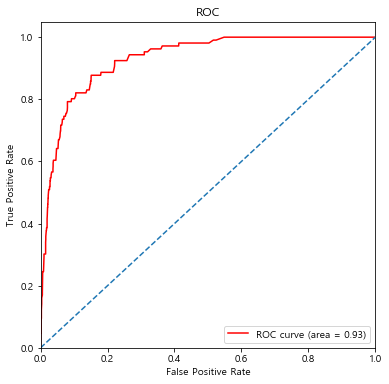

In [74]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

# 모델 구현완료, 검증용 데이터로 모델이 정확히 동작하는지 검증하기

In [76]:
movie_test = pd.read_csv('data/movie1-1.csv', encoding='CP949')

In [77]:
movie_test.columns

Index(['영화명', '매출액', '관객수', '대표국적', '배급사', '제작국가', '감독', '장르1', '장르2', '장르3',
       '장르4', '장르5', '장르6', '장르7', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', '장르6.1', '장르7.1'],
      dtype='object')

In [78]:
mybin = (0,1000000,20000000)
group_names = [0,1]
movie_test['흥행']=pd.cut(movie_test['관객수'], bins=mybin, labels = group_names)

In [79]:
see=['영화명', '관객수', '배급사', '대표국적', '감독', '장르1','흥행']

In [80]:
movie_test

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,장르6.1,장르7.1,흥행
0,출국,NaN,79713,3,0.0,한국,0.0,드라마,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,창궐,NaN,1599112,3,0.0,한국,1.8,액션,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,암수살인,NaN,3789222,3,2.9,한국,0.0,드라마,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,배반의장미,NaN,41054,3,2.7,한국,0.0,코미디,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [81]:
movie_test2 = movie_test[see]

In [82]:
movie_test2=movie_test2.set_index('영화명')

In [83]:
genre=pd.get_dummies(movie_test2['장르1'])

In [84]:
movie_test2=pd.concat([movie_test2,genre], axis=1)

In [85]:
X_new =movie_test2.drop(['관객수','장르1'], axis=1)
y_new = movie_test2['흥행']

In [86]:
X_new.shape\

(4, 7)

In [87]:
y_new.shape

(4,)

In [88]:
X_new

,배급사,대표국적,감독,흥행,드라마,액션,코미디
영화명,,,,,,,
출국,0.0,3,0.0,0,1,0,0
창궐,0.0,3,1.8,1,0,1,0
암수살인,2.9,3,0.0,1,1,0,0
배반의장미,2.7,3,0.0,0,0,0,1


In [89]:
y_new

영화명
출국       0
창궐       1
암수살인     1
배반의장미    0
Name: 흥행, dtype: category
Categories (2, int64): [0 < 1]

In [90]:
X_new.columns 

Index(['배급사', '대표국적', '감독', '흥행', '드라마', '액션', '코미디'], dtype='object')

In [91]:
X_new['SF']=0
X_new['성인']=0
X_new['가족']=0
X_new['공연']=0
X_new['공포(호러)']=0
X_new['기타']=0
X_new['다큐멘터리']=0
X_new['드라마']=0
X_new['멜로/로맨스']=0
X_new['뮤지컬']=0
X_new['미스터리']=0
X_new['범죄']=0
X_new['사극']=0
X_new['서부극(웨스턴)']=0
X_new['성인물(에로)']=0
X_new['스릴러']=0
X_new['애니메이션']=0
X_new['전쟁']=0
X_new['판타지']=0

In [92]:
X_new.columns 

Index(['배급사', '대표국적', '감독', '흥행', '드라마', '액션', '코미디', 'SF', '성인', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '전쟁', '판타지'],
      dtype='object')

In [98]:
X_new

,배급사,대표국적,감독,흥행,드라마,액션,코미디,SF,성인,가족,...,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,전쟁,판타지
영화명,,,,,,,,,,,,,,,,,,,,,
출국,0.0,3,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
창궐,0.0,3,1.8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
암수살인,2.9,3,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
배반의장미,2.7,3,0.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
clf.score(X_new,y_new)

0.25

In [108]:
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X_new, y = y_new, cv = 2)  
rfc_eval  # 10번의 교차 검증 결과를 보여준다

array([1. , 0.5])

In [109]:
rfc_eval.mean()

0.75